# Basic SVM model

Import neccessary libray, load dataset, set categories name and preprocess image data 

In [33]:
import os                         
import numpy as np                
import cv2                       
import matplotlib.pyplot as plt   
import pickle    
data_dir = 'SVM folder/'
categories = ['Avocado', 'Banana']
data = []
#Resharping image
for category in categories:
    #Create a new path which concatenate directory with category 
    path = os.path.join(data_dir, category)
    #Determine the current index category in the list represent as numerical data
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        #Read image
        pet_img = cv2.imread(imgpath, 0)
        try:
            #Resize image to (50, 50)
            pet_img = cv2.resize(pet_img, (50, 50))
            #Converting from 2-dimensional to 1-dimensional array
            #(Because SVM works with input data which is in vector form)
            image = np.array(pet_img).flatten()
            #Add image and label in Data
            data.append([image, label])
        except Exception as e:
            pass
#Display size image in data   
print(len(data))

917


The same step but we can use tensorflow for preprocess image dataset

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np 
import pickle  
data_dir = 'SVM folder/'
categories = ['Avocado', 'Banana']
img_height = 50
img_width = 50

# Load and preprocess the images
data = []
for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            # Load the image and resize it to (img_height, img_width)
            img = load_img(img_path, color_mode='grayscale', target_size=(img_height, img_width))
            # Convert the image to a numpy array and scale the pixel values to [0, 1]
            image = np.array(img).flatten()
            # Add the image and label to the data list
            data.append((image, label))
        except Exception as e:
            pass

# Display the number of images in the data list
print(len(data))

917


write process to file data.pickle and save 

In [28]:
#Write the data to file after Resharping
pick_in = open('data.pickle', 'wb')  #Write data
pickle.dump(data, pick_in)            #Save data to pickle file
pick_in.close()

Read file that we store extract feature from previous step

In [29]:
#Load and Read data store in data 
pick_in = open('data.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

Initialize features and lables for store data from data.pickle file

In [31]:
import random
#Initialize features and labels
random.shuffle(data) 
features = []
labels = []

In [32]:
#Get feature and label from data store in each arrays
for feature, label in data:
    features.append(feature)
    labels.append(label)

divid data for train and testing by using train_test_split

In [35]:
from sklearn.model_selection import train_test_split
#50% of Data is token for testing
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.50)

+ Build Model and Train data using svm.SVC() and .fit(xtrain, ytrain)
+ Evaluate the classifier on the testing data 
+ Save model.sav for prediction

In [41]:
from sklearn import svm 
#Build Model and Model Training
model = svm.SVC()
model.fit(xtrain, ytrain)

# Evaluate the classifier on the testing data
accuracy = model.score(xtest, ytest)
print(f'The accuracy of the classifier is {accuracy:.2%}.')

#Save as model.sav
pick = open('model.sav', 'wb')
pickle.dump(model,  pick)
pick.close()

The accuracy of the classifier is 100.00%.


This output high because we use small dataset

+ Load model.sav that sav svm model in previous step
+ create prediction use this model and if we want to know accuracy object for test we can write model.score(xtest, ytest)
+ set categories
+ print accuracy and prediction
+ show image of object

Accuracy:  1.0
Prediction:  Banana


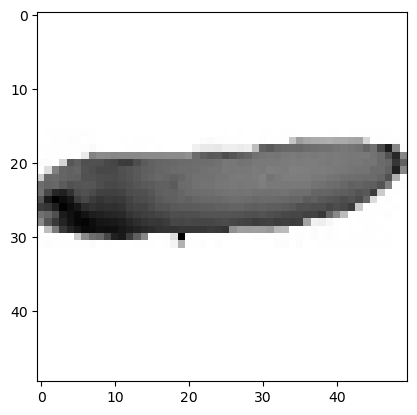

In [44]:
#Read Model for Prediction
pick =  open('model.sav', 'rb')
model = pickle.load(pick)
pick.close()

#Create prediction and accuracy object for test
prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

#Divide 2 Categories Dataset
categories = ['Avocado', 'Banana']

#Display the Accuracy and the prediction of animal
print('Accuracy: ', accuracy)
print('Prediction: ', categories[prediction[0]])

#Display pet image
pet = xtest[0].reshape(50,50)
plt.imshow(pet, cmap='gray')
plt.show()

# For VGG16 + SVM

Import neccessary library and load VGG16 model for extract feature for svm classifier

In [15]:
import h5py
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
import glob
# Load the VGG16 model
model = VGG16()


Load dataset and divide to images and labels of image

In [23]:
import os
data_dir = 'train/'
img_paths = glob.glob(os.path.join(data_dir, '*', '*.jpg'))
labels = [os.path.basename(os.path.dirname(img_path)) for img_path in img_paths]

+ Resize image and then convert to numpy array
  Reshape image data and put data to VGG16
  Extract feature using VGG16
  Add feature and its label to features[] and label_name[]
+ Convert list of feature and lable_name to array

In [24]:
from keras.applications.vgg16 import preprocess_input
# Extract features from the dataset using VGG16 model
features = []
label_name = []
for img_path, label in zip(img_paths, labels):
    # Load the image
    img = load_img(img_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Reshape the image data for the model
    img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))

    # Preprocess the image for the VGG16 model
    img_array = preprocess_input(img_array)

    # Extract features from the image using VGG16 model
    features_extracted = model.predict(img_array)

    # Add the features and label to the lists
    features.append(features_extracted)
    label_name.append(label)

# Convert the lists to numpy arrays
features = np.array(features)
label_name = np.array(label_name)



Note: This step require hardware and time base on size of dataset

Reshape features and encode lables as integers for write to file features.h5

In [22]:
# Flatten the feature vectors
features = features.reshape((features.shape[0], features.shape[2]))

# Encode the labels as integers
le = LabelEncoder()
labels_encoded = le.fit_transform(label_name)

# Save the features and labels to an HDF5 file
with h5py.File('features.h5', 'w') as hf:
    hf.create_dataset('features', data=features)
    hf.create_dataset('labels', data=labels_encoded)

In [20]:
label_name.shape

(16854,)

In [21]:
features.shape

(16854, 1, 1000)